190
[{'step': 20, 'train_accuracy': 65.0, 'validation_accuracy': 70.0, 'test_accuracy': 65.0}, {'step': 40, 'train_accuracy': 82.5, 'validation_accuracy': 57.49999999999999, 'test_accuracy': 40.0}, {'step': 60, 'train_accuracy': 85.0, 'validation_accuracy': 48.333333333333336, 'test_accuracy': 36.666666666666664}, {'step': 80, 'train_accuracy': 90.0, 'validation_accuracy': 50.0, 'test_accuracy': 38.75}, {'step': 100, 'train_accuracy': 73.0, 'validation_accuracy': 46.0, 'test_accuracy': 46.0}, {'step': 120, 'train_accuracy': 83.33333333333334, 'validation_accuracy': 54.46428571428571, 'test_accuracy': 53.84615384615385}, {'step': 140, 'train_accuracy': 82.85714285714286, 'validation_accuracy': 58.92857142857143, 'test_accuracy': 60.68376068376068}, {'step': 160, 'train_accuracy': 83.125, 'validation_accuracy': 59.82142857142857, 'test_accuracy': 64.95726495726495}, {'step': 180, 'train_accuracy': 79.44444444444444, 'validation_accuracy': 57.14285714285714, 'test_accuracy': 60.6837606837

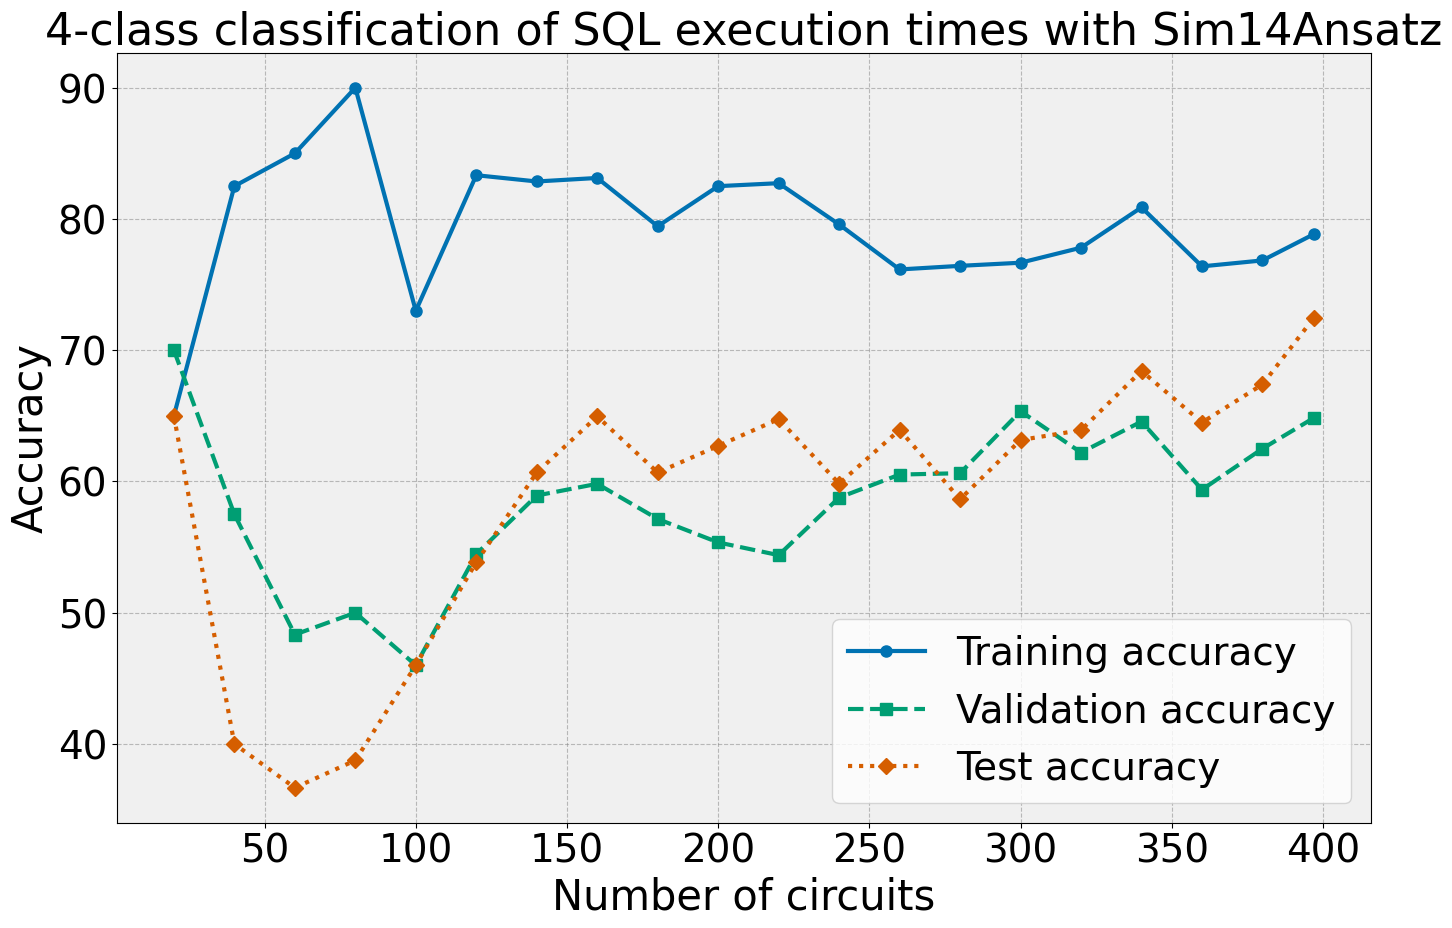

In [1]:
import json
import matplotlib.pyplot as plt

# Function to extract the maximum step data from the JSON results
def extract_max_step(json_data, key_step='step'):
    results = json_data['results']
    # Find the entry with the maximum step value
    max_step_entry = max(results, key=lambda x: x[key_step])
    return max_step_entry[key_step]

# Function to get the training data that matches the steps in test data
def match_train_data_with_test_steps(train_data, test_data, max_step):
    test_steps = [entry['step'] for entry in test_data['results']]
    matched_data = []
    
    i = 0
    for obj in train_data["results"]:
        if obj["step"] == max_step:
            matched_data.append({
            'step': test_steps[i],
            'train_accuracy': obj['accuracy']*100,
            'validation_accuracy': obj['validation_accuracy']*100,
            'test_accuracy': test_data['results'][i]["test_accuracy"]*100
                })
            i+=1
    
    return matched_data
            

def plot_accuracies(data):
    steps = [entry['step'] for entry in data]
    train_accuracies = [entry['train_accuracy'] for entry in data]
    validation_accuracies = [entry['validation_accuracy'] for entry in data]
    test_accuracies = [entry['test_accuracy'] for entry in data]
    
    x = 10
    plt.figure(figsize=(1.618*x, x), facecolor='lightgray')  # Increase plot size and set light gray background
    
    # Custom line styles, colors, and increased marker size
    plt.plot(steps, train_accuracies, label='Training accuracy', marker='o', color='#0072B2', markersize=8, linewidth=3, linestyle='-')
    plt.plot(steps, validation_accuracies, label='Validation accuracy', marker='s', color='#009E73', markersize=8, linewidth=3, linestyle='--')
    plt.plot(steps, test_accuracies, label='Test accuracy', marker='D', color='#D55E00', markersize=8, linewidth=3, linestyle=':')

    # Set axis labels and title with larger fonts
    plt.xlabel('Number of circuits', fontsize=30)
    plt.ylabel('Accuracy', fontsize=30)
    titles = ['Binary classification of SQL costs with IQPAnsatz', 'Binary classification of SQL execution times with Sim14Ansatz', '4-class classification of SQL execution times with Sim14Ansatz']
    plt.title(titles[-1], fontsize=32)

    # Increase the font size of tick labels
    plt.xticks(fontsize=28)
    plt.yticks(fontsize=28)
    
    # Move the legend outside the plot and increase font size
    plt.legend(fontsize=28, loc='lower right')

    # Add a grid with light gray color
    plt.grid(True, linestyle='--', color='gray', alpha=0.5)
    
    # Set background color for the axes (grid area)
    ax = plt.gca()
    ax.set_facecolor('#f0f0f0')  # Light gray background for grid area
    
    # Transparent background for figure
    #ax.patch.set_alpha(1.0)  # Set transparency for the plot area background
    plt.gcf().patch.set_alpha(0)  # Set full transparency for the figure background

    plt.savefig('9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_4.png', dpi=500, bbox_inches='tight', transparent=False)



# Read the training/validation accuracy JSON file
training_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/5_pennylane_optax_adamw_state_IQPAnsatz_cost_20_20_001_2/5_pennylane_optax_adamw_state_IQPAnsatz_cost_20_20_001_2_accuracy.json"
training_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_2/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_2_accuracy.json"
training_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_4/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_4_accuracy.json"

with open(training_accuracy_path, 'r') as f:
    train_validation_data = json.load(f)
    
# Read the test accuracy JSON file
test_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/5_pennylane_optax_adamw_state_IQPAnsatz_cost_20_20_001_2/test_accuracy.json"
test_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_2/test_accuracy.json"
test_accuracy_path = "/home/valter/SQL2Circuits/sql2circuits/training/results/9_pennylane_optax_adamw_state_Sim14Ansatz_execution_time_20_20_001_4/test_accuracy.json"
with open(test_accuracy_path, 'r') as f:
    test_data = json.load(f)

# Extract maximum step accuracy data
max_step = extract_max_step(train_validation_data)
print(max_step)
matched_data = match_train_data_with_test_steps(train_validation_data, test_data, max_step)
print(matched_data)
# Plot the accuracies
plot_accuracies(matched_data)
